In [1]:
import numpy as np
import pandas as pd
import MeCab
import re
import networkx as nx
import matplotlib.pyplot as plt
plt.rc('font',family='AppleGothic')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [8]:
from collections import Counter
import warnings
warnings.filterwarnings(action='ignore')

In [14]:
data = pd.read_excel('cafe_bk.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9221 entries, 0 to 9220
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9221 non-null   int64 
 1   content     9216 non-null   object
dtypes: int64(1), object(1)
memory usage: 144.2+ KB


In [15]:
data=data.dropna(axis=0, how='any', subset = ["content"]) 
data=data.reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       9216 non-null   int64 
 1   Unnamed: 0  9216 non-null   int64 
 2   content     9216 non-null   object
dtypes: int64(2), object(1)
memory usage: 216.1+ KB


In [16]:
del data['Unnamed: 0']

In [17]:
stopwords = ['천원', '꼭걸', '먹이', '그날', '삭제', '키', '정말', '입', '만', '포스팅', '약간', '정보', '말', '어제', '옵션', '아래', '분', '처음', '개', '년', '혹시', '사람', '시', '추천', '쌀', '애', '저희', '로', '이용', '판매', '체', '가요', '사', '번호', '이제', '나', '을', '경우', '오늘', '아주', '진짜', '모두', '자동', '날', '시골', '는', '손', '생각', '질문', '연락', '살', '역시', '센치', '구입', '끼', '용', '사실', '것', '배', '위', '요즘', '다른', '지금', '불', '시작', '다시', '우리', '은', '사랑', '거', '킹', '제품', '등', '조금', '내', '이후', '앞', '줄', '단계', '이번', '직접', '이', '재생', '좀', '미니', '봉', '가', '맘', '월', '듯', '중', '저', '신분', '첫', '미리', '더', '사용', '여기', '농사', '요', '한번', '작성', '게시', '주문', '어디', '농', '산', '개월', '거의', '안', '를', '완전', '제', '및', '실', '글', '원', '다음', '위해', '곳', '그냥', '구매', '초기', '준비', '도', '계속', '때', '유통', '살짝', '먹기', '후', '나눔', '때모두', '댓글', '알', '규정', '정도', '점', '스푼', '얼마', '화질', '일', '못', '마을', '만원', '아시', '하루', '걸', '전', '바로', '수', '또', '중기', '번', '먼저', '달', '기', '건', '반', '구', '숟가락', '사진', '선택', '사서', '호', '완성', '가지', '뭐', '가장', '내일', '공지', '때문', '방법', '보고', '이상', '끝', '하나', '해', '사항', '한국', '그', '습', '꼭', '왜', '떡뻥']

In [36]:
import konlpy
import re

In [51]:
from konlpy.tag import Okt


def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.morphs(x)
    # 한글자 키워드를 제거합니다.
    #nouns = [noun for noun in nouns if len(noun) > 1]
    # 불용어를 제거합니다.
    nouns = [noun for noun in nouns if noun not in stopwords]
    return nouns

# ‘ko_text’ 피처에 이를 적용합니다.
data['nouns'] = data['content'].apply(lambda x: get_nouns(x))
print(data.shape)
data.head()

(9216, 3)


,index,content,nouns
0,0,그동안 계속 공구후기며 공구게시판에서 보던 쌀찐빵을 구입했어요,"[그동안, 공, 후기, 며, 공, 게시판, 에서, 보던, 찐빵, 했어요]"
1,1,아기간식도 요즘 고민하고 있던 차에 백프로 쌀로 만든 찐빵이니 이거다 싶었어요,"[아기, 간식, 고민, 하고, 있던, 차, 에, 백프로, 만든, 찐빵, 이니, 다,..."
2,2,쌀찐빵을 구워봐야겠다 생각했어요,"[찐빵, 구워, 봐야겠다, 했어요]"
3,3,그랫더니 찜기와 후라이팬에서의 두가지가 고루 섞인 더 맛있는 찐빵이 되었어요,"[그랫더, 니, 찜, 기와, 후라이팬, 에서의, 두, 고루, 섞인, 맛있는, 찐빵,..."
4,4,겉은 바삭하고 속은 포근 촉촉넘넘 맛나요 올겨울 착한마을 쌀찐빵과 함께,"[겉, 바삭, 하고, 속, 포, 근, 촉촉, 넘, 넘, 맛, 올, 겨울, 착한, 찐..."


In [52]:
# 트랜잭션 데이터를 추출합니다.
transactions = data['nouns'].tolist()
transactions = [transaction for transaction in transactions if transaction] # 공백 문자열을 방지합니다.

In [53]:
ex_list=[]
for i in transactions:
    for j in i:
        ex_list.append(j)

In [54]:
count = Counter(ex_list)
count

Counter({'그동안': 26,
         '공': 77,
         '후기': 79,
         '며': 22,
         '게시판': 11,
         '에서': 736,
         '보던': 6,
         '찐빵': 155,
         '했어요': 229,
         '아기': 175,
         '간식': 283,
         '고민': 44,
         '하고': 563,
         '있던': 12,
         '차': 181,
         '에': 3723,
         '백프로': 11,
         '만든': 508,
         '이니': 17,
         '다': 429,
         '싶었어요': 10,
         '구워': 130,
         '봐야겠다': 1,
         '그랫더': 1,
         '니': 111,
         '찜': 14,
         '기와': 3,
         '후라이팬': 9,
         '에서의': 2,
         '두': 222,
         '고루': 2,
         '섞인': 6,
         '맛있는': 118,
         '되었어요': 27,
         '겉': 53,
         '바삭': 74,
         '속': 123,
         '포': 13,
         '근': 33,
         '촉촉': 33,
         '넘': 196,
         '맛': 871,
         '올': 15,
         '겨울': 13,
         '착한': 22,
         '과': 685,
         '함께': 117,
         '심심한': 1,
         '일요일': 10,
         '오': 74,
         '후당': 1,
         '머핀': 343,
 

In [55]:
words = dict(count.most_common())
words

{'에': 3723,
 ',': 2930,
 '\xa0': 2856,
 '\n': 2423,
 '가루': 2093,
 '빵': 2080,
 '식빵': 1982,
 '케이크': 1381,
 '반죽': 1357,
 '으로': 1258,
 '(': 1147,
 ')': 1100,
 '한': 969,
 '쿠키': 945,
 '들': 926,
 '맛': 871,
 '의': 864,
 '설탕': 841,
 'g': 802,
 '에서': 736,
 '오븐': 697,
 '과': 685,
 '밀가루': 681,
 '만들어': 673,
 '1': 673,
 '/': 619,
 '버터': 604,
 '잘': 566,
 '하고': 563,
 '초코': 561,
 '2': 552,
 '와': 526,
 '만든': 508,
 '해서': 504,
 '너무': 489,
 '넣고': 488,
 '고': 482,
 '카스테라': 476,
 '베이': 475,
 '크림': 468,
 '레시피': 465,
 '-': 451,
 '입니다': 451,
 '우유': 446,
 ':': 430,
 '다': 429,
 '발효': 419,
 '박력': 399,
 '아이': 381,
 '치즈': 378,
 '생크림': 369,
 '3': 367,
 '수업': 367,
 '머핀': 343,
 '재료': 321,
 '랑': 317,
 '님': 298,
 '집': 295,
 '떡': 293,
 '간식': 283,
 '4': 276,
 '만들었어요': 273,
 '있는': 273,
 '물': 272,
 '쌀빵': 262,
 '많이': 259,
 '서': 258,
 '딸기': 257,
 '소금': 253,
 '앙금': 253,
 '5': 248,
 '계란': 247,
 '강력': 240,
 '같아요': 240,
 '이나': 238,
 '케익': 236,
 '\xa0\xa0': 232,
 '식': 232,
 '이라': 230,
 '했어요': 229,
 '과자': 228,
 '시간': 223,
 '두': 222,
 '

In [56]:
from apyori import apriori
# 연관 분석을 수행합니다.
results = list(apriori(transactions,
    min_support=0.06,
    min_confidence=0.05,
    min_lift=1.0,
    max_length=2))

In [57]:
results

[RelationRecord(items=frozenset({'\n'}), support=0.0920138888888889, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'\n'}), confidence=0.0920138888888889, lift=1.0)]),
 RelationRecord(items=frozenset({'('}), support=0.07139756944444445, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'('}), confidence=0.07139756944444445, lift=1.0)]),
 RelationRecord(items=frozenset({')'}), support=0.0710720486111111, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({')'}), confidence=0.0710720486111111, lift=1.0)]),
 RelationRecord(items=frozenset({','}), support=0.1365017361111111, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({','}), confidence=0.1365017361111111, lift=1.0)]),
 RelationRecord(items=frozenset({'\xa0'}), support=0.08658854166666667, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'\xa0'}), confidence=0.086588541666666

In [58]:
# 데이터 프레임 형태로 정리합니다.
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

# 규칙의 조건절을 source, 결과절을 target, 지지도를 support 라는 데이터 프레임의 피처로 변환합니다.
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)

network_df.head()

,source,target,support
0,에,가루,0.062826


In [59]:
corpus = "".join(data['content'].tolist())

In [61]:
from konlpy.tag import Okt
from collections import Counter

# 명사 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.morphs(corpus)

nouns = [noun for noun in nouns if noun not in stopwords]
count = Counter(nouns)


# 한글자 키워드를 제거합니다.
#remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})

# 키워드와 키워드 빈도 점수를 ‘node’, ‘nodesize’ 라는 데이터 프레임의 피처로 생성합니다.
node_df = pd.DataFrame(count.items(), columns=['node', 'nodesize'])

In [64]:
node_df = node_df[node_df['nodesize'] >= 100] # 시각화의 편의를 위해 ‘nodesize’ 5 이하는 제거합니다.
node_df.head()

,node,nodesize
5,에서,736
7,찐빵,154
8,했어요,227
9,아기,174
10,간식,281


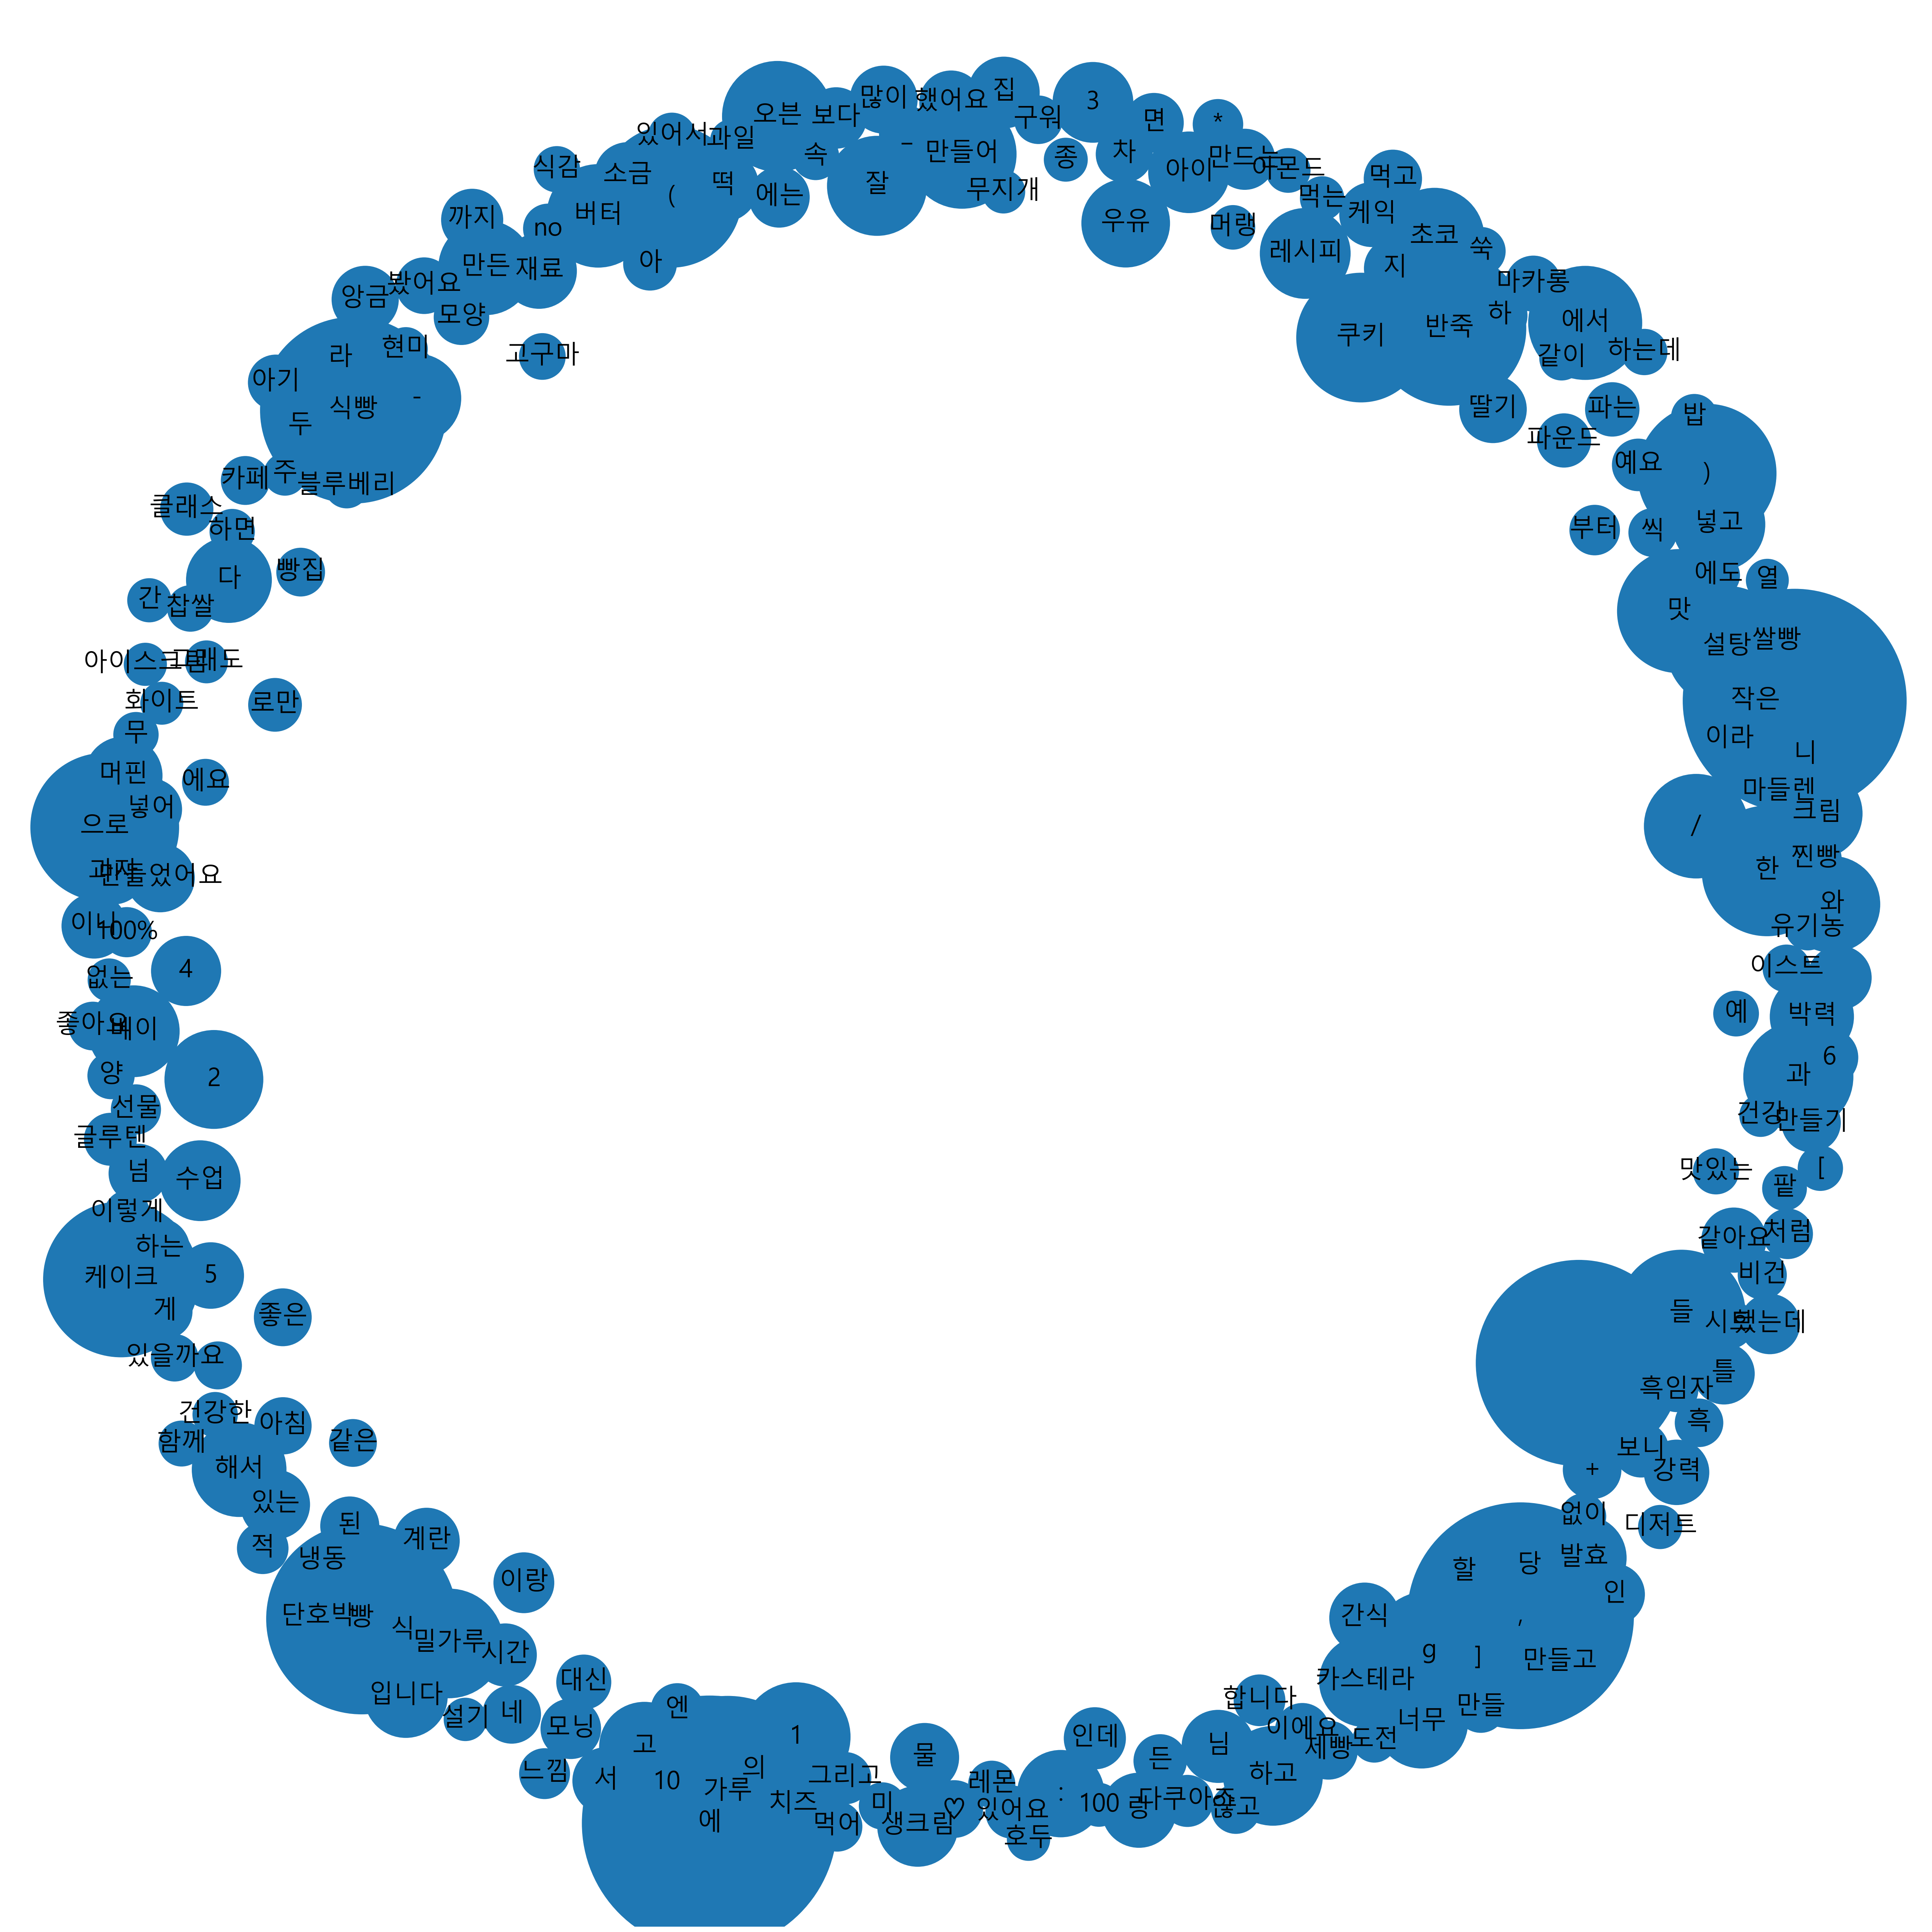

In [65]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.figure(figsize=(35,35))

# networkx 그래프 객체를 생성합니다.
G = nx.Graph()

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 ‘노드’ 역할을 하는 원을 생성합니다.
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])

# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘관계’ 역할을 하는 선을 생성합니다.
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])


# for node in G:
#     print(G.nodes[node])


# 그래프 디자인과 관련된 파라미터를 설정합니다.
pos = nx.spring_layout(G, k=0.6, iterations=50)
sizes = [G.nodes[node]['nodesize']*30 for node in G]
nx.draw(G, pos=pos, node_size=sizes)

#font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"
#fname = fm.FontProperties(fname=font_path).get_name()

nx.draw_networkx_labels(G, pos=pos, font_family="Malgun Gothic", font_size=33)



# # 그래프를 출력합니다.
ax = plt.gca()
plt.show()